In [58]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import csv
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',150)

In [2]:
def read_csv_with_progressbar(file_path, **kwargs):
    num_lines = sum(1 for line in open(file_path, encoding='latin-1')) 
    progress_bar = tqdm(total=num_lines)
    chunk_size = 10**6
    data_chunks = []
    for chunk in pd.read_csv(file_path, chunksize=chunk_size, **kwargs):
        data_chunks.append(chunk)
        progress_bar.update(chunk_size)
    data = pd.concat(data_chunks)
    progress_bar.close()
    return data

In [3]:
%%time

cases = read_csv_with_progressbar('/Users/stjames/Dropbox/Pablo/data/EOIR TRAC JUNE/A_TblCase.csv', 
                    sep='\t', 
                    dtype='str', 
                    error_bad_lines=False, 
                    warn_bad_lines=False, 
                    encoding='latin-1', 
                    na_values=' ', 
                    quoting=csv.QUOTE_NONE)

proceedings = read_csv_with_progressbar("/Users/stjames/Dropbox/Pablo/data/EOIR TRAC JUNE/B_TblProceeding.csv", 
                          sep='\t', 
                          dtype='str',
                          on_bad_lines='skip',
                          na_values=' ',
                          quoting=csv.QUOTE_NONE)

charges = read_csv_with_progressbar("/Users/stjames/Dropbox/Pablo/data/EOIR TRAC JUNE/B_TblProceedCharges.csv", 
                      sep='\t',
                      dtype='str', 
                      na_values=' ',
                      on_bad_lines='skip',
                      quoting=csv.QUOTE_NONE)

charge_lookup = read_csv_with_progressbar("/Users/stjames/Dropbox/Pablo/data/EOIR TRAC JUNE/Lookup/tbllookupCharges.csv", 
                            sep='\t',
                            dtype='str',
                            na_values=' ',
                            on_bad_lines='skip',
                            quoting=csv.QUOTE_NONE)
motions = read_csv_with_progressbar("/Users/stjames/Dropbox/Pablo/data/EOIR TRAC JUNE/tbl_Court_Motions.csv", 
                            sep='\t',
                            dtype='str',
                            na_values=' ',
                            on_bad_lines='skip',
                            quoting=csv.QUOTE_NONE) 
schedule = read_csv_with_progressbar("/Users/stjames/Dropbox/Pablo/data/EOIR TRAC JUNE/tbl_schedule.csv", 
                            sep='\t',
                            dtype='str',
                            na_values=' ',
                            on_bad_lines='skip',
                            quoting=csv.QUOTE_NONE)
case_identifier = read_csv_with_progressbar('/Users/stjames/Dropbox/Pablo/data/EOIR TRAC JUNE/A_TblCaseIdentifier.csv', 
                              sep='\t',
                              dtype='str',
                              na_values=' ',
                              on_bad_lines='skip',
                              quoting=csv.QUOTE_NONE)
schema = read_csv_with_progressbar('/Users/stjames/Dropbox/Pablo/data/EOIR TRAC JUNE/EOIRDB_Schema.csv', sep='\t',
                              dtype='str',
                              na_values=' ',
                              on_bad_lines='skip',
                              quoting=csv.QUOTE_NONE)

hlcodes = read_csv_with_progressbar('/Users/stjames/Dropbox/Pablo/data/EOIR TRAC JUNE/Lookup/tblLookupHloc.csv', sep='\t',
                              dtype='str',
                              na_values=' ',
                              on_bad_lines='skip',
                              quoting=csv.QUOTE_NONE)
case_id_lkup = read_csv_with_progressbar('/Users/stjames/Dropbox/Pablo/data/EOIR TRAC JUNE/Lookup/tblLookUpCaseIdentifier.csv', sep='\t',
                              dtype='str',
                              na_values=' ',
                              on_bad_lines='skip',
                              quoting=csv.QUOTE_NONE)
custody_history = read_csv_with_progressbar('/Users/stjames/Dropbox/Pablo/data/EOIR TRAC JUNE/tbl_CustodyHistory.csv', sep='\t',
                              dtype='str',
                              na_values=' ',
                              on_bad_lines='skip',
                              quoting=csv.QUOTE_NONE)
base_city_lkup = read_csv_with_progressbar('/Users/stjames/Dropbox/Pablo/data/EOIR TRAC JUNE/Lookup/tblLookupBaseCity.csv', sep='\t',
                              dtype='str',
                              na_values=' ',
                              on_bad_lines='skip',
                              quoting=csv.QUOTE_NONE)
hearing_loc = read_csv_with_progressbar('/Users/stjames/Dropbox/Pablo/data/EOIR TRAC JUNE/Lookup/tblLookupHloc.csv', sep='\t',
                              dtype='str',
                              na_values=' ',
                              on_bad_lines='skip',
                              quoting=csv.QUOTE_NONE)

  0%|          | 0/9360389 [00:00<?, ?it/s]<timed exec>:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


<timed exec>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


10000000it [00:54, 181826.97it/s]                            
13000000it [01:28, 146468.47it/s]                              
15000000it [00:23, 634581.69it/s]                              
1000000it [00:00, 35823033.04it/s]     
5000000it [01:07, 74002.89it/s]                              
34000000it [05:41, 99614.54it/s]                               
2000000it [00:02, 955249.88it/s]                             
1000000it [00:00, 106885757.24it/s]     
1000000it [00:00, 48049122.49it/s]     
1000000it [00:00, 156784689.00it/s]    
7000000it [00:08, 807363.92it/s]                             
1000000it [00:00, 85449811.55it/s]    


CPU times: user 6min 20s, sys: 2min 44s, total: 9min 5s
Wall time: 12min 34s


In [4]:
%%time

# clean motions table

motions = motions.reset_index()

# Shift column names two spaces to the left

motions.columns = list(motions.columns[2:]) + ['blank 1', 'blank 2']

In [5]:
%%time

# clean schedule & proceedings table

# Function to check if a value is numerical
def is_numerical(value):
    if isinstance(value, (int, float)):
        return True
    elif isinstance(value, str) and value.isdigit():
        return True
    return False

# Vectorize the function to work with Pandas Series
vectorized_is_numerical = np.vectorize(is_numerical)

# Create a boolean mask indicating valid IDNCASE values
valid_idncase_mask = vectorized_is_numerical(schedule["IDNCASE"])
valid_idncase_mask_1 = vectorized_is_numerical(proceedings["IDNCASE"])


# Print the invalid IDNCASE values
print("Dropping rows with non-numerical IDNCASE values:")
print(schedule.loc[~valid_idncase_mask, "IDNCASE"])
print(proceedings.loc[~valid_idncase_mask_1, "IDNCASE"])


# Use boolean indexing to keep only rows with numerical IDNCASE values
schedule = schedule[valid_idncase_mask]
proceedings = proceedings[valid_idncase_mask_1]


# convert IDNCASE to int if they are not NA and are digits
proceedings['IDNCASE'] = pd.to_numeric(proceedings['IDNCASE'], errors='coerce').dropna().astype(int)
schedule['IDNCASE'] = pd.to_numeric(schedule['IDNCASE'], errors='coerce').dropna().astype(int)


# convert date values to dt

schedule.INPUT_DATE = pd.to_datetime(schedule.INPUT_DATE, errors='coerce')

Dropping rows with non-numerical IDNCASE values:
16120776    2007-05-11 23:46:14.963
32462882    2007-02-08 22:58:00.013
32675668    2007-02-08 23:02:57.967
32919114    2007-02-08 23:26:39.623
Name: IDNCASE, dtype: object
2093144     2004-10-04 00:00:00.000
2354041     2005-05-20 00:00:00.000
3628703     2002-10-22 00:00:00.000
5294912                            
7393216     2003-05-12 00:00:00.000
8131072     2001-03-23 00:00:00.000
8924491     2004-11-17 00:00:00.000
9793314     2006-12-27 00:00:00.000
10409716    2007-04-02 00:00:00.000
10753664    2004-08-23 00:00:00.000
Name: IDNCASE, dtype: object


In [6]:
%%time
# convert IDNCASE to int if they are not NA and are digits
case_identifier['IDNCASE'] = pd.to_numeric(case_identifier['IDNCASE'], errors='coerce').dropna().astype(int)
cases['IDNCASE'] = pd.to_numeric(cases['IDNCASE'], errors='coerce').dropna().astype(int)

In [7]:
print(f"Cases: {cases.shape[0]:,}")
print(f"Proceedings: {proceedings.shape[0]:,}")
print(f"Motions: {motions.shape[0]:,}")
print(f"Schedule: {schedule.shape[0]:,}")

Cases: 9,360,337
Proceedings: 12,148,780
Motions: 4,629,241
Schedule: 33,813,961


In [8]:
%%time

# filter california
# probably need to use BASE_CITY_CODE
CA = base_city_lkup[base_city_lkup['BASE_STATE']=='CA']

In [9]:
%% time

# these are my final 4 filters, 2 for proceedings and 2 for cases
# i can ensure the following

# 1) QR appointed after a JCI (excluding QRs w/ missing JCIs
# 2) QR appointed in the same proceeding as JCI
# 3) JCI and QR appointed in the same state (CA)

# selecting proceedings

JPCA = schedule[(schedule['ADJ_RSN']=='62') & (schedule['BASE_CITY_CODE'].isin(CA.BASE_CITY_CODE))]['IDNPROCEEDING'].drop_duplicates().to_frame()
QPCA = schedule[(schedule['ADJ_RSN']=='61') & (schedule['BASE_CITY_CODE'].isin(CA.BASE_CITY_CODE))]['IDNPROCEEDING'].drop_duplicates().to_frame()
QPCA = JPCA[JPCA['IDNPROCEEDING'].isin(QPCA['IDNPROCEEDING'])]

# selecting cases 

JCCA = schedule[(schedule['ADJ_RSN']=='62') & (schedule['BASE_CITY_CODE'].isin(CA.BASE_CITY_CODE))]['IDNCASE'].drop_duplicates().to_frame()
QCCA = schedule[(schedule['ADJ_RSN']=='61') & (schedule['BASE_CITY_CODE'].isin(CA.BASE_CITY_CODE))]['IDNCASE'].drop_duplicates().to_frame()
QCCA = JCCA[JCCA['IDNCASE'].isin(QCCA['IDNCASE'])]



In [10]:
CASES = {'JCCA':JCCA, 'QCCA':QCCA} 

PROCEEDINGS = {'JPCA':JPCA, 'QPCA':QPCA}

for name, df in CASES.items():
    print(f"Case Category: {name}, Number of cases: {df.shape[0]}")

for name, df in PROCEEDINGS.items():
    print(f"Proceeding Category: {name}, Number of proceedings: {df.shape[0]}")

Case Category: JCCA, Number of cases: 1510
Case Category: QCCA, Number of cases: 539
Proceeding Category: JPCA, Number of proceedings: 1549
Proceeding Category: QPCA, Number of proceedings: 493


In [ ]:
# some EDA

In [151]:
# selecting schedule w/ filters

SCH_JPCA = schedule[schedule['IDNPROCEEDING'].isin(JPCA.IDNPROCEEDING)]
SCH_QPCA = schedule[schedule['IDNPROCEEDING'].isin(QPCA.IDNPROCEEDING)]

PRO_JPCA = proceedings[proceedings['IDNPROCEEDING'].isin(JPCA.IDNPROCEEDING)]
PRO_QPCA = proceedings[proceedings['IDNPROCEEDING'].isin(QPCA.IDNPROCEEDING)]

In [152]:
# Convert 'ADJ_DATE' to datetime 
SCH_JPCA['ADJ_DATE'] = pd.to_datetime(SCH_JPCA['ADJ_DATE'])
SCH_QPCA['ADJ_DATE'] = pd.to_datetime(SCH_QPCA['ADJ_DATE'])


# Keep only the date portion
SCH_JPCA['ADJ_DATE'] = SCH_JPCA['ADJ_DATE'].dt.date
SCH_QPCA['ADJ_DATE'] = SCH_QPCA['ADJ_DATE'].dt.date

/var/folders/nq/c298dxfn1sgcvrvkkcwthl980000gn/T/ipykernel_33405/3309327904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SCH_JPCA['ADJ_DATE'] = pd.to_datetime(SCH_JPCA['ADJ_DATE'])
/var/folders/nq/c298dxfn1sgcvrvkkcwthl980000gn/T/ipykernel_33405/3309327904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SCH_QPCA['ADJ_DATE'] = pd.to_datetime(SCH_QPCA['ADJ_DATE'])
/var/folders/nq/c298dxfn1sgcvrvkkcwthl980000gn/T/ipykernel_33405/3309327904.py:7: SettingWithCopyWarning: 
A value is trying to be set o

In [153]:
# Create a copy of the DataFrame, keeping only the rows where ADJ_RSN is '62'
SCH_JPCA_62 = SCH_JPCA[SCH_JPCA['ADJ_RSN']=='62'].copy()
SCH_QPCA_62 = SCH_QPCA[SCH_QPCA['ADJ_RSN']=='62'].copy()

In [154]:
SCH_QPCA_61 = SCH_QPCA[SCH_QPCA['ADJ_RSN']=='61'].copy()

In [30]:
PRO_JPCA.CASE_TYPE.value_counts()

RMV    1410
WHO     114
AOC      13
DEP       5
RFR       4
CFR       3
Name: CASE_TYPE, dtype: int64

In [32]:
PRO_JPCA.NAT.value_counts().head()

MX    849
ES    147
GT    105
HO     98
IN     31
Name: NAT, dtype: int64

In [33]:
PRO_JPCA.LANG.value_counts().head()

SP     933
ENG    440
PUN     24
CRE     13
MAM     12
Name: LANG, dtype: int64

In [ ]:
# calendar types

In [111]:
SCH_JPCA_62.CAL_TYPE.value_counts()

M    1350
I     556
Name: CAL_TYPE, dtype: int64

In [112]:
SCH_QPCA_62.CAL_TYPE.value_counts()

M    480
I    139
Name: CAL_TYPE, dtype: int64

In [113]:
SCH_QPCA_61.CAL_TYPE.value_counts()

M    368
I    260
Name: CAL_TYPE, dtype: int64

In [116]:
# not sure what this means... not sure how courts are recording master vs individual in this context
# or why there are duplicate JCIs on the same date labeled both master and individual
# i have to remove these duplicates for analysis

In [61]:
# how many hearings w/ ADJ RSN 62 per proceeding? 

# first w/ all hearings 

# then w/ only those w/ QR

In [155]:
# Create a copy of the DataFrame, keeping only the rows where ADJ_RSN is '62'
SCH_JPCA_62a = SCH_JPCA_62.copy()

# Drop duplicates based on 'IDNPROCEEDING' and 'ADJ_DATE'
SCH_JPCA_62a.drop_duplicates(subset=['IDNPROCEEDING', 'ADJ_DATE'], inplace=True)

# Now, we can count the number of adjourned hearings for each 'IDNPROCEEDING'
count_adjourned_hearings = SCH_JPCA_62a['IDNCASE'].value_counts()

# 'count_adjourned_hearings' is a Series with 'IDNPROCEEDING' as the index and the counts as the values


In [124]:
count_adjourned_hearings.head()

8400630.0    6
8021759.0    5
7696175.0    4
8140774.0    4
7671346.0    4
Name: IDNCASE, dtype: int64

In [173]:
# short list of JCI hearings >= 3

JCI3 = count_adjourned_hearings>=3
JCI3 = JCI3[JCI3==True]
JCI3 = list(JCI3.index)
JCI3

[7576015.0,
 7936316.0,
 8021759.0,
 7946031.0,
 8392107.0,
 9213275.0,
 8758332.0,
 8546454.0,
 7872516.0,
 8156182.0,
 8331714.0,
 8226060.0,
 7912564.0,
 8243996.0,
 8149788.0,
 8348744.0,
 8390744.0,
 7724872.0,
 8239093.0,
 7148691.0,
 8111236.0]

In [126]:
count_adjourned_hearings.describe()

count    1510.000000
mean        1.187417
std         0.480198
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: IDNCASE, dtype: float64

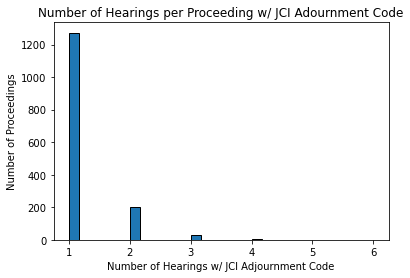

In [127]:
# Create histogram
plt.hist(count_adjourned_hearings, bins=30, edgecolor='black')

# Add title and labels
plt.title('Number of Hearings per Proceeding w/ JCI Adournment Code')
plt.xlabel('Number of Hearings w/ JCI Adjournment Code')
plt.ylabel('Number of Proceedings')

# Show plot
plt.show()


In [156]:
# Create a copy of the DataFrame, keeping only the rows where ADJ_RSN is '62'
SCH_QPCA_62a = SCH_QPCA_62.copy()

# Drop duplicates based on 'IDNPROCEEDING' and 'ADJ_DATE'
SCH_QPCA_62a.drop_duplicates(subset=['IDNPROCEEDING', 'ADJ_DATE'], inplace=True)

# Now, we can count the number of adjourned hearings for each 'IDNPROCEEDING'
count_adjourned_hearings = SCH_QPCA_62['IDNCASE'].value_counts()

# 'count_adjourned_hearings' is a Series with 'IDNPROCEEDING' as the index and the counts as the values


In [142]:
count_adjourned_hearings.head()

8021759.0    5
7946031.0    4
8226060.0    3
7576015.0    3
8390744.0    3
Name: IDNCASE, dtype: int64

In [130]:
count_adjourned_hearings.describe()

count    493.000000
mean       1.172414
std        0.473580
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: IDNCASE, dtype: float64

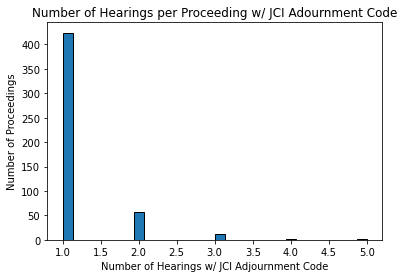

In [131]:
# Create histogram
plt.hist(count_adjourned_hearings, bins=30, edgecolor='black')

# Add title and labels
plt.title('Number of Hearings per Proceeding w/ JCI Adournment Code')
plt.xlabel('Number of Hearings w/ JCI Adjournment Code')
plt.ylabel('Number of Proceedings')

# Show plot
plt.show()


In [68]:
# similar information

In [215]:
# what about the date distribution? 
# ADJ_DATE is the scheduled date of the hearing
# INPUT_DATE results in a very similar graph. I may want to use this instead because it may be a better indicator

In [216]:
# first for JCIS

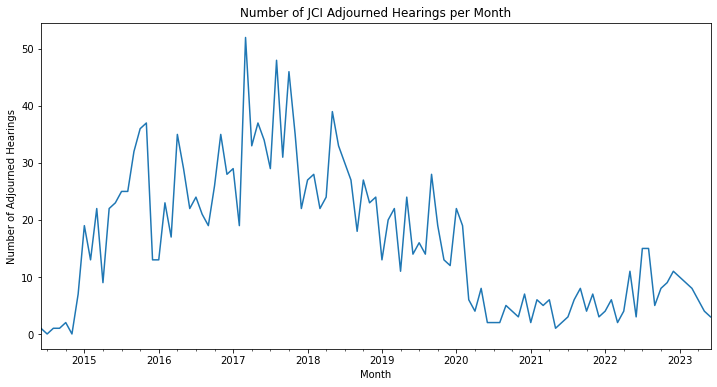

In [217]:
SCH_JPCA_62a['INPUT_DATE'] = pd.to_datetime(SCH_JPCA_62a['INPUT_DATE'])

# Ensure 'ADJ_DATE' is the index
SCH_JPCA_62b = SCH_JPCA_62a.set_index('INPUT_DATE')

# Resample and count the number of adjourned hearings per month
count_per_month = SCH_JPCA_62b.resample('M').size()

# Plot the results
count_per_month.plot(kind='line', figsize=(12, 6))
plt.title('Number of JCI Adjourned Hearings per Month')
plt.ylabel('Number of Adjourned Hearings')
plt.xlabel('Month')
plt.show()


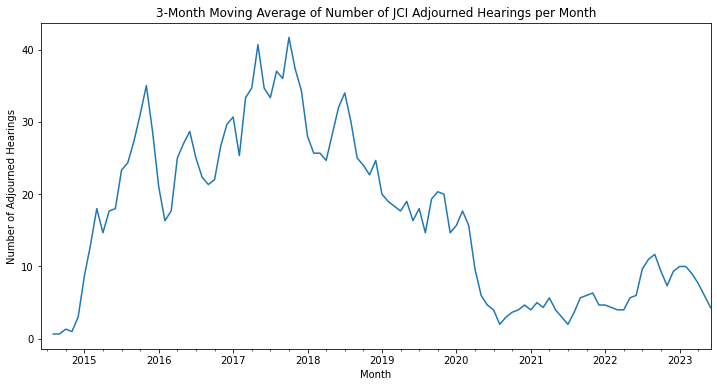

In [218]:
# Calculate 3-month moving average
count_per_month_smoothed = count_per_month.rolling(window=3).mean()

# Plot the results
count_per_month_smoothed.plot(kind='line', figsize=(12, 6))
plt.title('3-Month Moving Average of Number of JCI Adjourned Hearings per Month')
plt.ylabel('Number of Adjourned Hearings')
plt.xlabel('Month')
plt.show()


In [219]:
# Now JCIs for those that got a QR later

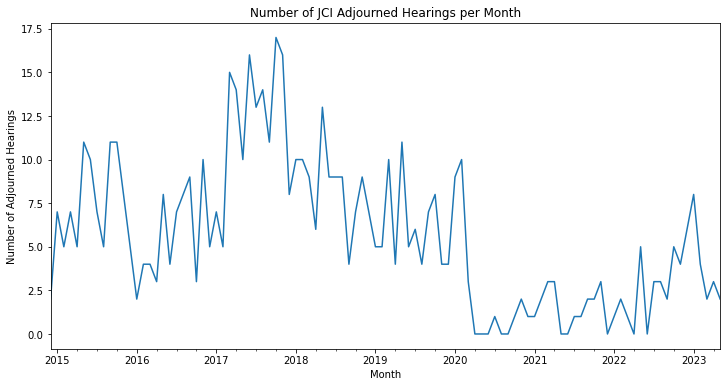

In [220]:
SCH_QPCA_62a['INPUT_DATE'] = pd.to_datetime(SCH_QPCA_62a['INPUT_DATE'])

# Ensure 'ADJ_DATE' is the index
SCH_QPCA_62b = SCH_QPCA_62a.set_index('INPUT_DATE')

# Resample and count the number of adjourned hearings per month
count_per_month = SCH_QPCA_62b.resample('M').size()

# Plot the results
count_per_month.plot(kind='line', figsize=(12, 6))
plt.title('Number of JCI Adjourned Hearings per Month')
plt.ylabel('Number of Adjourned Hearings')
plt.xlabel('Month')
plt.show()

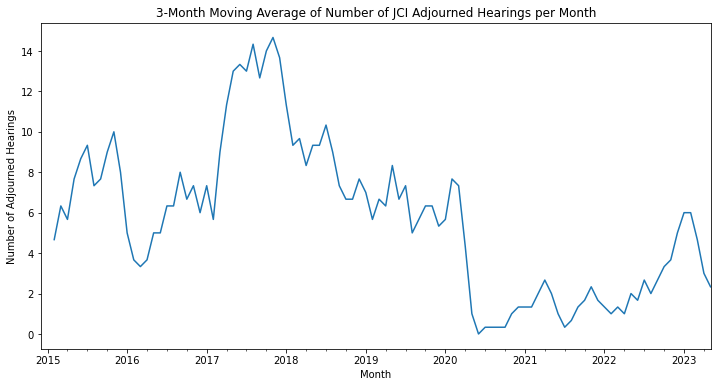

In [221]:
# Calculate 3-month moving average
count_per_month_smoothed = count_per_month.rolling(window=3).mean()

# Plot the results
count_per_month_smoothed.plot(kind='line', figsize=(12, 6))
plt.title('3-Month Moving Average of Number of JCI Adjourned Hearings per Month')
plt.ylabel('Number of Adjourned Hearings')
plt.xlabel('Month')
plt.show()

In [222]:
# now for QRs

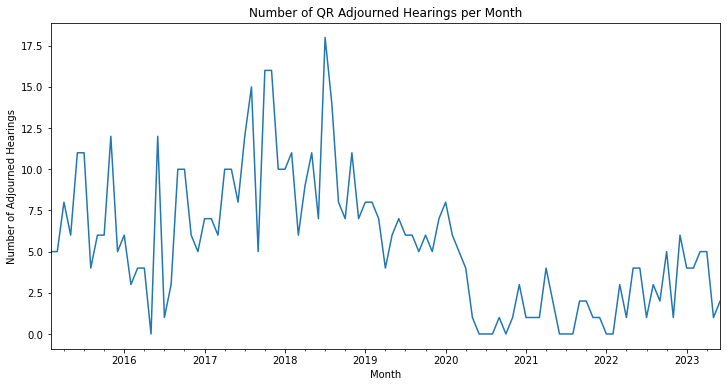

In [244]:
SCH_QPCA_61['INPUT_DATE'] = pd.to_datetime(SCH_QPCA_61['INPUT_DATE'])
SCH_QPCA_61a = SCH_QPCA_61.drop_duplicates(subset=['IDNPROCEEDING', 'ADJ_DATE'])

# Ensure 'ADJ_DATE' is the index
SCH_QPCA_61b = SCH_QPCA_61a.set_index('INPUT_DATE')


# Resample and count the number of adjourned hearings per month
count_per_month = SCH_QPCA_61b.resample('M').size()

# Plot the results
count_per_month.plot(kind='line', figsize=(12, 6))
plt.title('Number of QR Adjourned Hearings per Month')
plt.ylabel('Number of Adjourned Hearings')
plt.xlabel('Month')
plt.show()

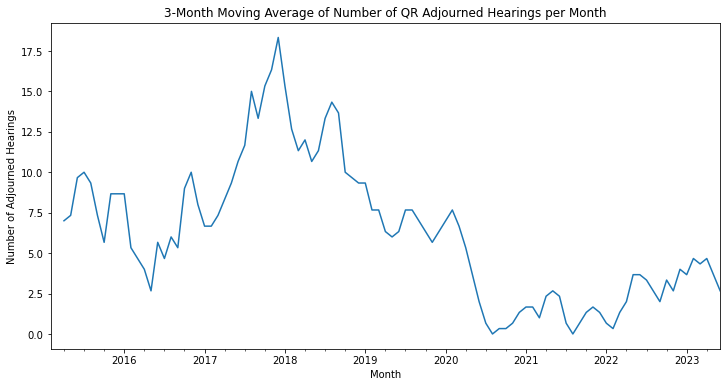

In [224]:
# Calculate 3-month moving average
count_per_month_smoothed = count_per_month.rolling(window=3).mean()

# Plot the results
count_per_month_smoothed.plot(kind='line', figsize=(12, 6))
plt.title('3-Month Moving Average of Number of QR Adjourned Hearings per Month')
plt.ylabel('Number of Adjourned Hearings')
plt.xlabel('Month')
plt.show()

In [225]:
# definitely looks like # of JCI and QR appointments is decreasing over time - solid peak in 2018

In [226]:
# TODO
# grant rate of JCI and QR - over time
# time between JCI # 1 and QR


In [227]:
# time between JCI # 1 and QR

filtered_df = SCH_JPCA[SCH_JPCA['ADJ_RSN'].isin(['62', '61'])]
filtered_df = filtered_df.sort_values(['IDNPROCEEDING', 'ADJ_DATE'])
grouped_dates = filtered_df.groupby(['IDNPROCEEDING', 'ADJ_RSN'])['ADJ_DATE'].first().unstack()
grouped_dates['time_diff'] = (grouped_dates['61'] - grouped_dates['62']).dt.days


In [228]:
grouped_dates[grouped_dates.time_diff<0].head()

ADJ_RSN,61,62,time_diff
IDNPROCEEDING,,,
6774182,2015-02-10,2015-03-04,-22.0
6788152,2015-03-03,2015-03-25,-22.0
6866513,2015-06-10,2015-06-16,-6.0
6866868,2015-09-16,2015-10-15,-29.0
6944222,2015-08-05,2015-09-02,-28.0


In [229]:
grouped_dates[grouped_dates.time_diff>0].describe()

ADJ_RSN,time_diff
count,462.000000
mean,36.129870
std,36.085287
min,1.000000
25%,14.000000
50%,21.000000
75%,51.000000
max,247.000000


In [333]:
filtered_df = SCH_JPCA[SCH_JPCA['ADJ_RSN'].isin(['62', '61'])]
filtered_df = filtered_df.sort_values(['IDNPROCEEDING', 'INPUT_DATE'])
grouped_dates = filtered_df.groupby(['IDNPROCEEDING', 'ADJ_RSN'])['INPUT_DATE'].first().unstack()
grouped_dates['time_diff_days'] = (grouped_dates['61'] - grouped_dates['62']).dt.days


In [335]:
grouped_dates[grouped_dates.time_diff_days<0].head()

ADJ_RSN,61,62,time_diff_days
IDNPROCEEDING,,,
7569126,2017-03-13,2017-03-14,-1.0
7851290,2017-10-18,2017-10-23,-5.0


In [336]:
# this is a good table

round(grouped_dates[grouped_dates.time_diff_days>0].describe(), 2)

ADJ_RSN,time_diff_days
count,488.00
mean,36.16
std,35.80
min,1.00
25%,13.00
50%,24.50
75%,43.00
max,278.00


In [233]:
# very annoyingly, going off ADJ_DATE frequently shows QRs appointed before JCIs. 
# going off INPUT_DATE eliminates this somewhat
# will try to calculate avg for values > 0 for both to see if there is any meaningful difference
# the values are somewhat similar. I feel like trusting input date a little more but hard to tell. 

In [235]:
# grant rate

/var/folders/nq/c298dxfn1sgcvrvkkcwthl980000gn/T/ipykernel_33405/2423697175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_62['granted'] = df_62['IDNPROCEEDING'].isin(df_61['IDNPROCEEDING'])
/var/folders/nq/c298dxfn1sgcvrvkkcwthl980000gn/T/ipykernel_33405/2423697175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_62['INPUT_DATE'] = pd.to_datetime(df_62['INPUT_DATE'])


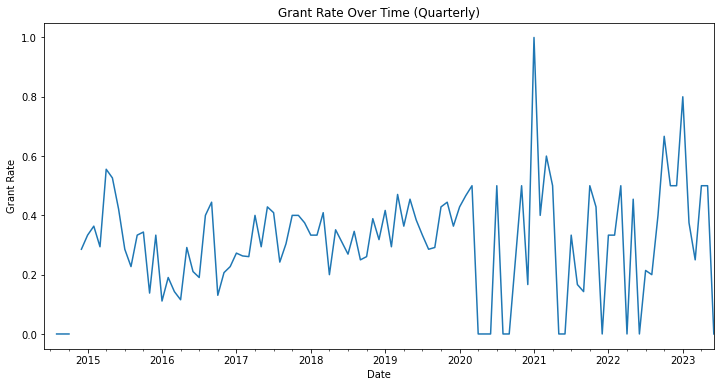

In [257]:
df_62 = SCH_JPCA_62a.drop_duplicates('IDNPROCEEDING', keep='first')
df_61 = SCH_QPCA_61a.drop_duplicates('IDNPROCEEDING', keep='first')
df_62['granted'] = df_62['IDNPROCEEDING'].isin(df_61['IDNPROCEEDING'])
df_62['INPUT_DATE'] = pd.to_datetime(df_62['INPUT_DATE'])
df_62.set_index('INPUT_DATE', inplace=True)
quarterly_grant_rate = df_62.resample('m')['granted'].mean()
quarterly_grant_rate.plot(kind='line', figsize=(12, 6))
plt.title('Grant Rate Over Time (Quarterly)')
plt.ylabel('Grant Rate')
plt.xlabel('Date')
plt.show()



In [ ]:
# per IJ

In [328]:
df_62 = SCH_JPCA_62a.drop_duplicates('IDNPROCEEDING', keep='last') # keeping last instead of first to account for any changes in IJ between JCIs, if any
df_61 = SCH_QPCA_61a.drop_duplicates('IDNPROCEEDING', keep='first')
df_62['granted'] = df_62['IDNPROCEEDING'].isin(df_61['IDNPROCEEDING'])
df_62['INPUT_DATE'] = pd.to_datetime(df_62['INPUT_DATE'])
df_62.set_index('INPUT_DATE', inplace=True)

/var/folders/nq/c298dxfn1sgcvrvkkcwthl980000gn/T/ipykernel_33405/4224647383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_62['granted'] = df_62['IDNPROCEEDING'].isin(df_61['IDNPROCEEDING'])
/var/folders/nq/c298dxfn1sgcvrvkkcwthl980000gn/T/ipykernel_33405/4224647383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_62['INPUT_DATE'] = pd.to_datetime(df_62['INPUT_DATE'])


In [366]:
# Let's assume 'n' is the threshold value for the minimum number of cases
n = 10

# First, get the count of cases per IJ
cases_per_IJ = df_62.groupby('IJ_CODE')['IDNPROCEEDING'].count()

# Filter out IJs with less than 'n' cases
valid_IJs = cases_per_IJ[cases_per_IJ >= n].index
valid_IJs_series = cases_per_IJ[cases_per_IJ >= n]

# Recalculate the grant rate, but now only considering valid IJs
valid_cases = df_62[df_62['IJ_CODE'].isin(valid_IJs)]
granted_cases_by_IJ_CODE = valid_cases[valid_cases['granted']]['IJ_CODE'].value_counts()
total_cases_by_IJ_CODE = valid_cases['IJ_CODE'].value_counts()
grant_rate_by_IJ_CODE = granted_cases_by_IJ_CODE / total_cases_by_IJ_CODE

# Sort in descending order and multiply by 100 for percentage
grant_rate_by_IJ_CODE = round(grant_rate_by_IJ_CODE.sort_values(ascending=False) * 100, 1)

# Convert the index to a Series
valid_IJs_series = pd.Series(valid_IJs_series, name='CASE_COUNT')

# Combine the two series into a DataFrame
df_IJ_valid_stats = pd.concat([valid_IJs_series, grant_rate_by_IJ_CODE], axis=1)
df_IJ_valid_stats = df_IJ_valid_stats.reset_index()
df_IJ_valid_stats = df_IJ_valid_stats.rename(columns={'IJ_CODE':'QR_RATE', 'index':'IJ_CODE'})
df_IJ_valid_stats = df_IJ_valid_stats.sort_values('CASE_COUNT', ascending=False)
df_IJ_valid_stats.fillna(0, inplace=True)


In [367]:
# this is a good table

df_IJ_valid_stats

,IJ_CODE,CASE_COUNT,QR_RATE
18,KWR,165,33.3
33,ZZD,73,34.2
2,ATL,69,43.5
12,JCL,69,14.5
1,ASM,64,26.6
27,SS2,60,36.7
11,IRS,53,47.2
14,JML,49,46.9
26,SJS,45,37.8
0,APA,45,62.2


In [338]:
# by court

In [341]:
hearing_loc = read_csv_with_progressbar('/Users/stjames/Dropbox/Pablo/data/EOIR TRAC JUNE/Lookup/tblLookupHloc.csv', sep='\t',
                              dtype='str',
                              na_values=' ',
                              on_bad_lines='skip',
                              quoting=csv.QUOTE_NONE)

1000000it [00:00, 10664388.51it/s]     


In [357]:
n=10

# First, get the count of cases per hloc
cases_per_court = df_62.groupby('HEARING_LOC_CODE')['IDNPROCEEDING'].count()

# Filter out IJs with less than 'n' cases
valid_locs = cases_per_court[cases_per_court >= n].index
valid_locs_series = cases_per_court[cases_per_court >= n]

# Recalculate the grant rate, but now only considering valid IJs
valid_cases = df_62[df_62['HEARING_LOC_CODE'].isin(valid_locs)]
granted_cases_by_hloc = valid_cases[valid_cases['granted']]['HEARING_LOC_CODE'].value_counts()
total_cases_by_hloc = valid_cases['HEARING_LOC_CODE'].value_counts()
grant_rate_by_hloc = granted_cases_by_hloc / total_cases_by_hloc

# Sort in descending order and multiply by 100 for percentage
grant_rate_by_hloc = round(grant_rate_by_hloc.sort_values(ascending=False) * 100, 1)

# Convert the index to a Series
valid_locs_series = pd.Series(valid_locs_series, name='CASE_COUNT')

# Combine the two series into a DataFrame
df_hloc_valid_stats = pd.concat([valid_locs_series, grant_rate_by_hloc], axis=1)
df_hloc_valid_stats = df_hloc_valid_stats.reset_index()
df_hloc_valid_stats = df_hloc_valid_stats.rename(columns={'HEARING_LOC_CODE':'QR_RATE', 'index':'HEARING_LOC_CODE'})
df_hloc_valid_stats = df_hloc_valid_stats.sort_values('CASE_COUNT', ascending=False)
df_hloc_valid_stats.QR_RATE.fillna(0, inplace=True)

In [368]:
# another good table

# some locations absolutely no QRs granted?

df_hloc_valid_stats

,HEARING_LOC_CODE,CASE_COUNT,QR_RATE
2,ADW,354,44.1
11,SFD,200,31.5
3,CCA,191,25.1
10,OTM,178,56.2
5,LA3,166,27.1
6,LOS,85,0.0
13,SFV,72,0.0
7,MCM,61,52.5
12,SFR,48,0.0
0,ADE,47,38.3


In [389]:
# is base city any diff? 

In [ ]:
# by LANG

In [385]:
# First, get the count of cases per LANG
cases_per_LANG = df_62.groupby('LANG')['IDNPROCEEDING'].count()

# Filter out IJs with less than 'n' cases
valid_LANG = cases_per_LANG.index
valid_LANG_series = cases_per_LANG

# Recalculate the grant rate, but now only considering valid IJs
valid_cases = df_62[df_62['LANG'].isin(valid_LANG)]
granted_cases_by_LANG = valid_cases[valid_cases['granted']]['LANG'].value_counts()
total_cases_by_LANG = valid_cases['LANG'].value_counts()
grant_rate_by_LANG = granted_cases_by_LANG / total_cases_by_LANG

# Sort in descending order and multiply by 100 for percentage
grant_rate_by_LANG = round(grant_rate_by_LANG.sort_values(ascending=False) * 100, 1)

# Convert the index to a Series
valid_LANG_series = pd.Series(valid_LANG_series, name='CASE_COUNT')

# Combine the two series into a DataFrame
df_LANG_valid_stats = pd.concat([valid_LANG_series, grant_rate_by_LANG], axis=1)
df_LANG_valid_stats = df_LANG_valid_stats.reset_index()
df_LANG_valid_stats = df_LANG_valid_stats.rename(columns={'LANG':'QR_RATE', 'index':'LANG'})
df_LANG_valid_stats = df_LANG_valid_stats.sort_values(['CASE_COUNT', 'QR_RATE'], ascending=False)
df_LANG_valid_stats.QR_RATE.fillna(0, inplace=True)

In [386]:
df_LANG_valid_stats

,LANG,CASE_COUNT,QR_RATE
36,SP,995,32.6
9,ENG,401,32.7
31,PUN,24,12.5
7,CRE,10,40.0
1,AR,10,20.0
2,ARM,10,10.0
26,MAN,9,44.4
45,VIE,9,44.4
33,RUS,7,28.6
25,MAM,7,14.3
